In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/simple-linear-regression/kc_house_data.csv


In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error , r2_score

In [4]:
df = pd.read_csv('/kaggle/input/simple-linear-regression/kc_house_data.csv')


In [5]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [6]:
x = df.iloc[:,5].values.reshape(-1,1)
y = df.iloc[:,2].values.reshape(-1,1)

In [7]:
df['price'].isnull().sum()

np.int64(0)

In [8]:
df['sqft_living'].isnull().sum()

np.int64(0)

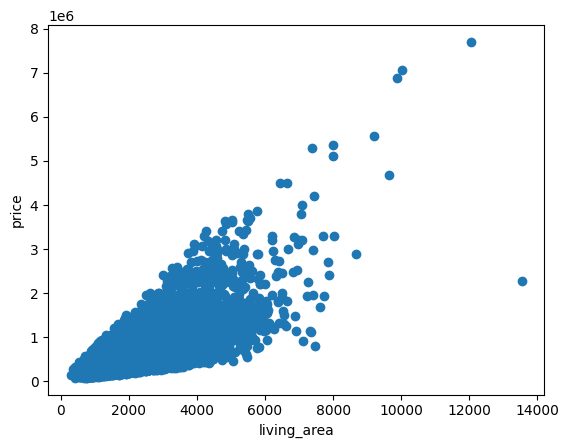

In [9]:
import matplotlib.pyplot as plt
plt.scatter(x,y)
plt.xlabel("living_area")
plt.ylabel("price")
plt.show()

In [10]:
model = LinearRegression()

In [11]:
# split
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42
)

# train
model.fit(x_train, y_train)

# predict
y_pred = model.predict(x_test)

# evaluate
print("MAE:" , mean_absolute_error(y_test, y_pred))
print("MSE:" , mean_squared_error(y_test, y_pred))
print("RMSE:" ,np.sqrt(mean_absolute_error(y_test, y_pred)))
print("R2_score:" ,r2_score(y_test,y_pred))


MAE: 177867.54034434858
MSE: 76484977061.77612
RMSE: 421.74345323235144
R2_score: 0.49406905389089006


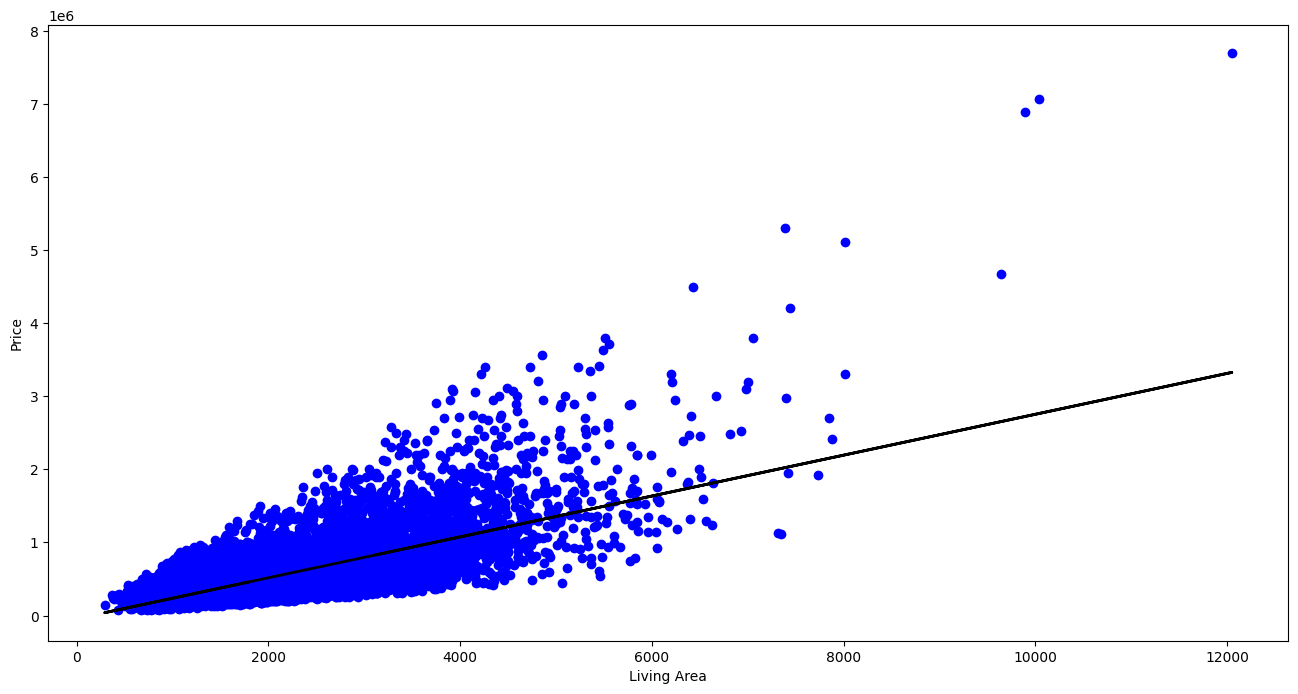

In [12]:
y_pred = model.predict(x_train)
plt.figure(figsize=(16, 8))
plt.scatter(
     x_train,
     y_train,
     c='blue'
)
plt.plot(
    x_train,
    y_pred,
    c='black',
    linewidth=2
)
plt.xlabel("Living Area")
plt.ylabel("Price")
plt.show()

y = mx + b

In [13]:
model.coef_


array([[279.55477932]])

In [14]:
model.intercept_


array([-41999.18603994])